# Homework 3: Analyzing, modeling, and visualizing data with Pandas and conceptualizing compartmental models

### <p style="text-align: right;"> &#9989; Put your name here </p>

# Grapevines in a warming world 🍇🔥🌎

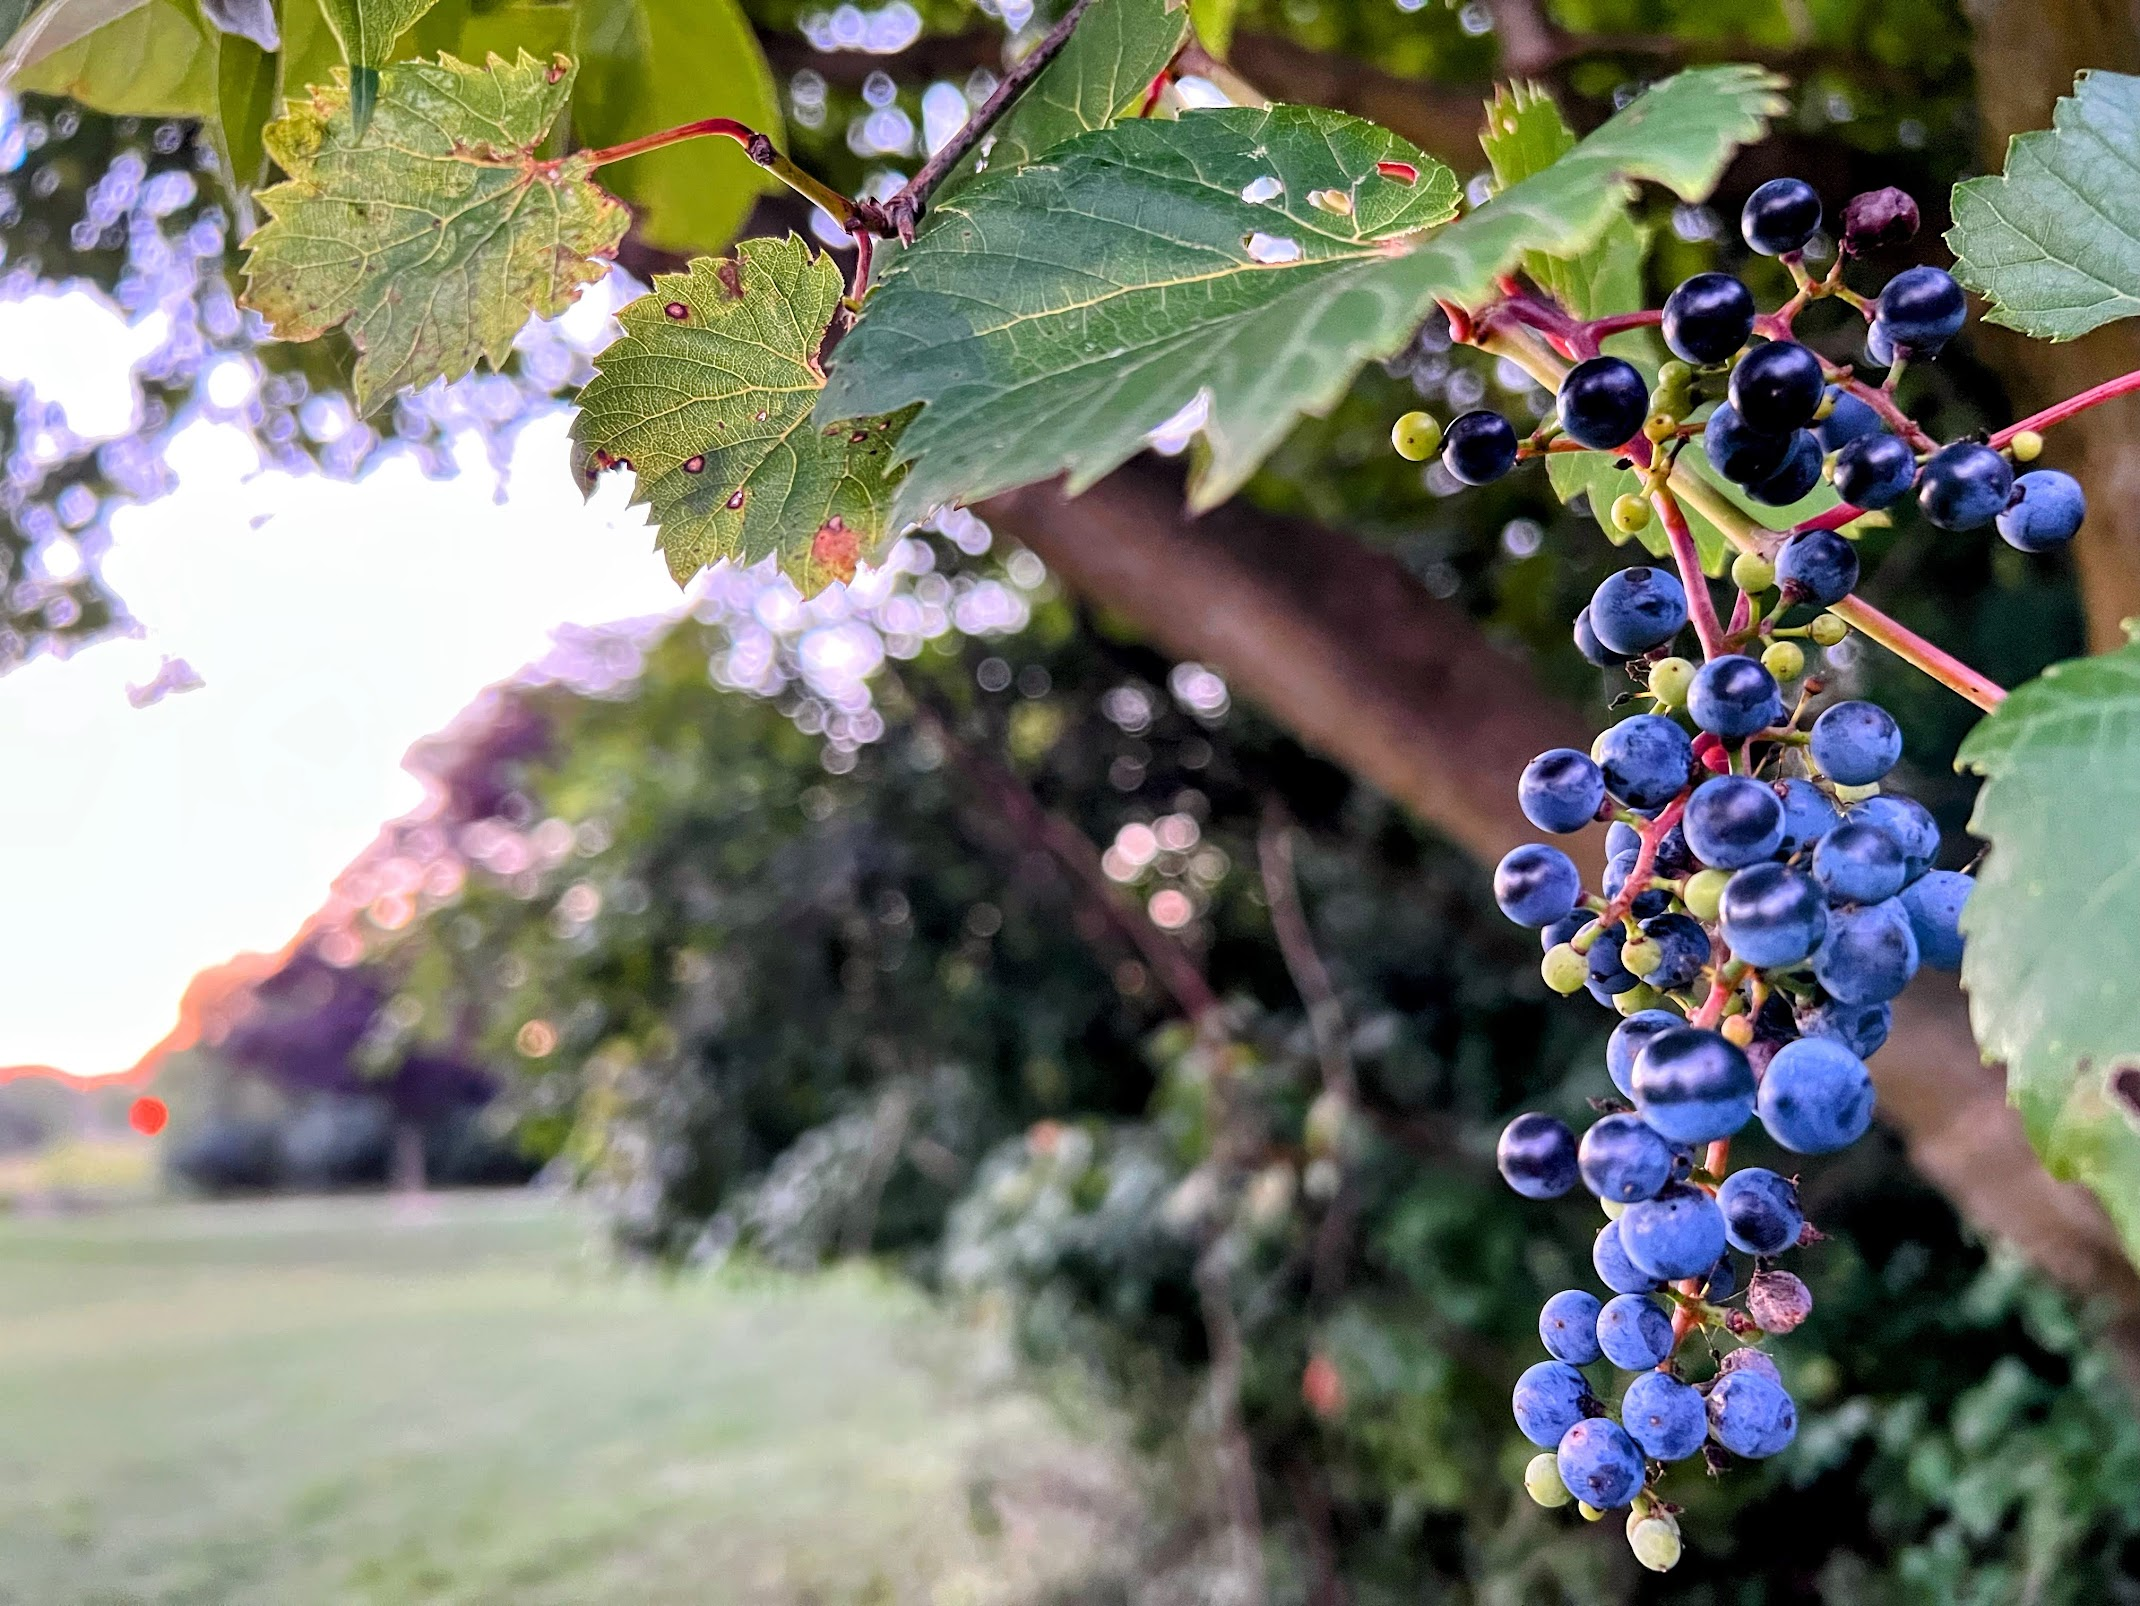

Image description: A *Vitis riparia* grape cluster hangs from a vine as late afternoon light filters through leaves. (📸 *Dan Chitwood, Albert A. White Memorial Park, East Lansing, Michigan. August 26, 2022*)

## Learning Goals

* Using pandas to work with data and clean it
* Make meaningful visual representations of the data
* Fitting curves to data and evaluating model fit
* Conceptualizing compartmental models

___

## Assignment instructions

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

**This assignment is due at 11:59pm on Friday, November 3, 2023** 

It should be uploaded into D2L Homework #3.  Submission instructions can be found at the end of the notebook.

---
<a id="toc"></a>

## Table of Contents

[Part 0. Academic Integrity Statement](#part_0) (2 points)

[Part 1. Reading, describing, and cleaning data](#part_1)  (22 points)

[Part 2. Exploratory Data Analysis and Data visualization](#part_2)  (20 points)

[Part 3. Fitting curves to data.](#part_3) (18 points)

[Part 4. Compartmental modeling](#part_4) (16 points)
    

---
<a id="part_0"></a>

## Part 0. Academic integrity statement (2 points)

[Back to Top](#toc)

In the markdown cell below, paste your personal academic integrity statement. By including this statement, you are confirming that you are submitting this as your own work and not that of someone else.

<font size=6 color="#009600">&#9998;</font> *Put your personal academic integrity statement here.*

Before we read in the data and begin working with it, let's import the libraries that we would typically use for this task. You can always come back to this cell and import additional libraries that you need.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

---
<a id="part_1"></a>

## Part 1: Reading, describing, and cleaning data (22 total points)

[Back to Top](#toc)

After visiting Michigan and learning that wine grapes can be grown (and that wine can be made!) in such a cold place, you decide that you would like to start a vineyard there. You've seen the vineyards and know that, although it is possible to grow wine grapes there, that sometimes it is too cold. You wonder if because of climate change, Michigan might soon have a warmer, more suitable climate for growing grapes. 

You know that Europe has a long history of growing grapes, and you wonder if they kept records that might indicate how grapes respond to changes in temperature. You find a [study](https://www.clim-past.net/8/1403/2012/cp-8-1403-2012.pdf)$^{1}$, that has compiled numerous records of grape harvest dates for more than four centuries and also a [database](http://www.climatemonitor.it/?page_id=40210&lang=en)$^{2}$ of temperature anomalies in Europe dating back to 1655.

$^{1}$Daux et al. (2012). An open-access database of grape harvest dates for climate
research: data description and quality assessment. *Clim. Past*, 8:1403–1418.  
$^{2}$Mariani and Zavatti. A dataset of the European average temperature anomalies for the period 1655-2016. http://www.climatemonitor.it/?page_id=40210&lang=en, accessed 3 October 2023.


### 1.1 Read the data (1 point)

&#9989;&nbsp; **Task**

Read in the data from `grape_harvest.csv` into a Pandas dataframe (0.5 pt) and display the `head` of the data (0.5 pt).

In [2]:
## your code here

### 1.2 Describe the data (3 points)

#### 1.2.1 &#9989;&nbsp; **Task (1 point)**

Use `describe` to display several summary statistics from the data frame.

In [5]:
## your code here

#### 1.2.2 &#9989;&nbsp; **Task (2 points)**
The columns in this dataset represent the following:

* **`year`**: the year the data was collected
* **`region`**: the region in Europe that the data was collected from
* **`harvest`**: the harvest date recorded. Harvest date is defined as number of days after August 31st. A negative number means the grapes were harvested before August 31st that year, and a positive number after.
* **`anomaly`**: the temperature anomaly. For a given year, this number represents how much colder (negative) or hotter (positive) Europe was compared to a long term reference value, in degrees Celsius

Using the results from `describe` above, write in the markdown cell below:

1. The ***earliest and latest `year`*** represented in this study (1 pt)
2. The ***coldest and hottest temperature anomaly in degrees Celsius*** represented in this study (1pt)

<font size=8 color="#009600">&#9998;</font> Put your answer here:  

**Part 1 (1pt):**  

**Part 2 (1pt):**


### 1.3 Isolating and performing basic statistics on data (4 points)

#### 1.3.1 &#9989;&nbsp; **Task (1 point)**

Display the `harvest` column on its own using the name of the column.

In [9]:
## your code here

#### 1.3.2 &#9989;&nbsp; **Task (1 points)**

Using `.iloc`, display the first five rows of just the `harvest` column.

In [12]:
## your code here

#### 1.3.3 &#9989;&nbsp; **Task (2 points)**

Using `mean` and `median` functions, print out the mean and median `harvest` values for all the data.

In [15]:
## your code here

### 1.4 Filter the data using masking (7 points)

**1.4.1** &#9989;&nbsp; **Task (6 points)**

You want to know if the grape harvest date is changing, and if so, is it getting earlier or later?

You decide that you would like to know the median grape harvest date for the following 50 year intervals, as well as the median since the year 2000:

* 1800-1849
* 1850-1899
* 1900-1949
* 1950-1999
* 2000-2007

**For each of the above intervals, calculate the median grape harvest date. For each interval print out statements saying "The median harvest date for years (*insert interval here*) is: x."** (6 pts)

**Hint:** You can write Boolean statements for values within an interval as:

``` python
data["column"] >= value & data["column"] <= value
```

In [18]:
## your code here

**1.4.2** &#9989;&nbsp; **Task (1 pt)**

Is the harvest date getting earlier or later with time? Remember, `harvest` is defined as number of days after August 31st. A negative number means the grapes were harvested before August 31st that year, and a positive number after.

<font size=8 color="#009600">&#9998;</font> Put your answer here

### 1.5 Clean out the NaN values (7 points)

#### 1.5.1 &#9989;&nbsp; **Task (1 points)**
Using `value_counts`, display all the different `region` values represented in the data.

In [22]:
## your code here

#### 1.5.2 &#9989;&nbsp; **Task (2 points)**
Oh no!!! You observe `"michigan"` as a region! What is Michigan doing in this dataset?!?

Using masking, create a new dataframe with only `"michigan"` data (1 pt) and display the results (1 pt).

In [25]:
## your code here

#### 1.5.3 &#9989;&nbsp; **Task (1 point)**
You observe `"NaN"` values in the `"michigan"` data. Create a new, "clean" dataframe (0.5 pt) that removes the `"michigan"` data and associated `"NaN"` data (0.5 pt). Use the built in pandas function `dropna` to do this (google it to learn more!).

In [28]:
## your code here

#### 1.5.4 &#9989;&nbsp; **Task (2 points)**
Now that you have the original and clean datasets, determine the number of rows in each of them (1 pt). Print out your results (1 pt).

In [ ]:
## your code here

#### 1.5.5 &#9989;&nbsp; **Task (1 point)**
Let's reflect on the cleaning process. Was there any `"michigan"` data that affected your results? (0.5 pts). For this specific dataset, if you hadn't dropped the `"NaN"` data, would it matter? (0.5 pts).

<font size=8 color="#009600">&#9998;</font> Put your answer here

**Part 1 (0.5pt):**  

**Part 2 (0.5pt):**  


---
<a id="part_2"></a>

## Part 2: Exploratory Data Analysis (20 total points)

[Back to Top](#toc)

It's time to explore our data! Let's visualize our data and look for correlations in our grapevine dataset.

### Part 2.1: Correlations (5 points)

There are three columns with numerical values in our dataset and one with string values. We can only look for correlations between columns with numerical values.

&#9989;&nbsp; **Do this (1 points):** Print or display a correlation matrix using only the columns with numerical values. _Hint1:_ Look up the pandas `corr` function for dataframes. _Hint2:_ To select multiple columns, use the following notation: `df[["col1"], ["col2"]]`

In [34]:
# Put your code here

&#9989;&nbsp; **Answer this question (4 points):** In your opinion, would you consider any of the correlations ***between*** the columns to be strong? (1 pt) For the correlations between each pair of columns, describe the direction of the correlation in plain words (3 sentences, one describing each pair) (3 pts, 1 pt each).

<font size=8 color="#009600">&#9998;</font> Put your answer here

**Part 1 (1pt):**  

**Part 2 (3pts):**  


### Part 2.2: Visual representation of correlations (15 points)

The numbers above gives us a quantitative measure of the correlations in the dataset. As you can see, `year`, `anomaly`, and `harvest` all have correlative relationships with each other, regardless if these relationships are strong or weak.

Visualization in data science is a very important skill!!! In the next exercise, you will visualize the relationships between these variables as scatterplots. You will create a plot for each relationship: 1) `anomaly` vs. `year`, 2) `harvest` vs. `year`, and 3) `harvest` vs. `anomaly`.

We want to make a plot similar to the one below:

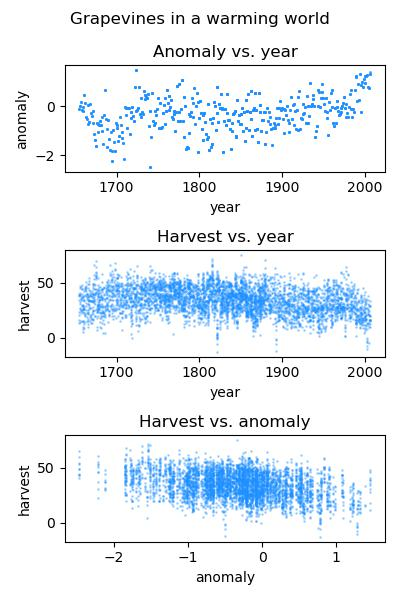

&#9989;&nbsp; **Do this (12 points):**  Use `matplotlib` to make three _scatter plots_ like the ones above. For full points, do the following:

- Create 3 subplots using `plt.subplot`. Use 3 rows and 1 column **(3 points)**.
- Use `plt.figure` and the argument `figsize` to make a plot 4 inches wide x 6 inches long **(1 point)**.
- Plot 1) `anomaly` vs. `year`, 2) `harvest` vs. `year`, and 3) `harvest` vs. `anomaly`. Provide a title for each subplot **(1 point)**.
- Give the overall plot the title `Grapevines in a warming world` **(1 point)**
- Provide x-axis labels **(1 point)**.
- Provide y-axis labels **(1 point)**.
- Create variables for point size, color, and alpha outside of the code for your plots. Use the variables you created to control size, color, and alpha in your subplots. Use the same parameters for all the plots. Choose appropriate point size, color, and alpha so that you can see the relationships in your data (avoid overplotting) **(3 points, one for each)**.
- Use `tight_layout` to give your plot optimal sizing **(1 points)**.

In [37]:
# Put your code here

&#9989;&nbsp; **Answer the following (3 points):** Looking at the plots, 

1. Which plots looks like it has the strongest correlation? Justify your answer (1 point).
2. Which plot looks the most linear? (1 point).
3. Which plot do you believe would be the easiest to create a model for. Justify your answer (1 point).

<font size=8 color="#009600">&#9998;</font> Put your answer here

**Part 1 (1pt):**  

**Part 2 (1pt):**  

**Part 3 (1pt):**  


---
<a id="part_3"></a>

## Part 3: Fitting curves to data. Harvest date as a function of temperature anomaly (18 points)

[Back to Top](#toc)

Now that we have visualized our data we can formulate a question in a guided way. In this section, we will ask:

> What is the relationship between harvest date and temperature anomaly? Can we predict harvest date from temperature anomaly?

### Part 3.1: Model
In the above plots we notice that `harvest` (almost) linearly declines as `anomaly` increases in value. Specifically, 

$$ harvest  = m\times anomaly + b $$

Where $harvest$ is the harvest date represented by the variable `harvest`, $anomaly$ is the temperature anomaly in degrees Celsius represented by the variable `anomaly`, and $m$ is the slope of the line and $b$ the intercept.

&#9989;&nbsp; **Do this (4 points):** 
- Write a function called `harvest_model` that calculates harvest date based on temperature anomaly using the equation above. The equation should be constructed so that you can build a model using the `curve_fit` function in the next section.

In [41]:
# Put your code here

### Part 3.2: Fit the model

&#9989;&nbsp; **Do this (6 points):** 

- Use a dataset without `NaN` values. To build your model, it is important that you use data without `NaN` values, otherwise you will get an error. In part 1.5, you removed `NaN` values from this dataset. If you were able to successfully remove the `NaN` values, you can use the clean dataset. Otherwise, code to read in a clean dataset by url is provided. You can uncomment out this line and use this dataset if you like. (1 point)
- Now use `curve_fit` with your `harvest_model` function to find the slope ($m$) and intercept ($b$) parameters. (4 points)
- Print out the value of the slope $m$, write "The value of the slope is..." (0.5 points)
- Print out the value of the intercept $b$, write "The value of the intercept is..." (0.5 points)

In [9]:
# Put your code here

# You can use the following url from GitHub to read in a dataset with no NaNs:
# clean_grape_df = pd.read_csv("https://raw.githubusercontent.com/DanChitwood/PlantsAndPython/master/grape_harvest.csv")


### Part 3.3 Check your model (8 points)

&#9989;&nbsp; **Do this (6 points):**  Make a plot comparing your model and the data.

- Plot the actual data (2 points)
- Plot your modeled data (2 points)
- Use x and y axis labels and title (1 point)
- Adjust the color, size, and alpha of the datapoints to avoid overplotting. Make sure the plot of your model is a different color than the datapoints so that you can see it. (1 point)

In [45]:
# Put your code here

&#9989;&nbsp; **Answer the following (2 points):** 
Do you think your model is a good model? Clearly justify your answer (looking for more than a "yes" or "no" answer).

<font size=8 color="#009600">&#9998;</font> Put your answer here

---
<a id="part_4"></a>

## Part 4: Compartmental modeling (16 points)

[Back to Top](#toc)

---
**IMPORTANT NOTE**
>You will learn about compartmental models starting with the Day 18 pre-class, which will be covered just before this homework is due! The video and virus example below are from the Day 18 pre-class. ***Watch the entire video below***. You will see that the example is about plants, which is relevant to this homework question!!! After the video, ***read the virus example and study the diagram***.
---

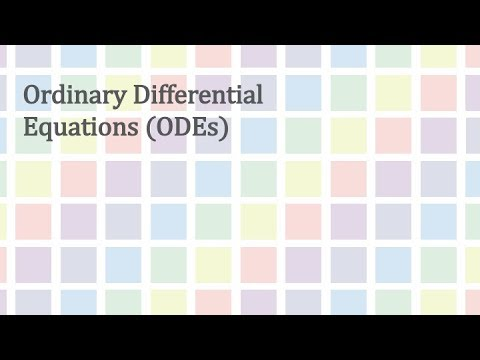

In [48]:
from IPython.display import YouTubeVideo 
YouTubeVideo("0N3qB5vaJhA",width=640,height=360)

After watching the video above, read this example of a compartmental model of virus kinetics:

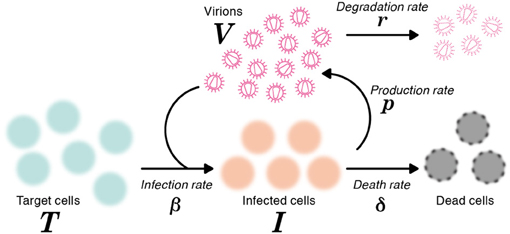

How do viruses work? We need to understand a bit about this in order to build our model. The most important feature is that viruses cannot reproduce on their own - that is what they need you for. Your body, to a virus, is simply a factory for making and spreading more of them. If virions were writing the history books, humans would simply be their maternity ward. The way this works is that virions enter your cells, where there is a factory at work to keep the cell functioning, and they give all of the factory workers new instructions. A factory that was making cars, once the virions enter, is now making laptops; or, in this case, rather than keeping the cell alive and healthy, the machinery of the cells makes more virions. For every virion that enters a cell, that cell might make hundreds of new virions, leading to a population explosion. Your body will need to quickly mount an immune response to keep this under control. 

What ***compartments*** might we need? (Look at the picture above.)
* **T**arget cells; these are the healthy cells the virion might enter
* **I**nfected cell; these cells produce new virions, and might die over time
* **V**irion population; the number of virions at any given time during the infection

What ***parameters*** will we need?
* rate at which cells become infected: this reduces the value of T and increases the value of I
* the production rate of new virions, which increases the value of V
* rate at which infected cells die
* rate at which virions degrade and leave the system

What ***equations*** can we write?:

$$\frac{dT}{dt} = -\beta TV,$$ 

$$\frac{dI}{dt} = \beta TV - \delta I,$$ 

$$\frac{dV}{dt} = pI - rV.$$

As you saw, compartmental modeling is all about ***flow***, about the ***rates*** of transfer between different compartments. It makes a lot of sense therefore that differential equations, which calculate rates of change of those compartments, are central to compartmental models.

You can build compartmental models in the following order:

**1. Define the compartments, the boxes, how much of something:** When you descirbe the flow, transfer, or transition to one state to another, what are those states, what are the containers? Target cells (T) become infected cells (I). Infected cells (I) become virus particles (V). In the video you saw that water is in a bowl (B) before being transferred to a plant (P). Define the boxes in your model. These are usually the start and end points as something changes into another or something is transferred between containers. The variables representing the boxes represent ***what quantity is in the box***: how many target or infected cells or virus particles, how much water in the bowl or the plant? Your boxes will be connected by arrows, or rates. Ultimately, you will be defining differential equations to model the ***rates of change*** of your compartment values.

**2. Define the arrows, connecting to and between your boxes, the rates of change or transfer or transformation:** Because the compartmental model is all about flow, the arrows between the boxes represent rates. What is the rate ($\beta$) of target cells becoming infected cells? What is the rate ($\rho$) of infected cells producing virions? What is the rate (t) of the transfer of water from the bowl to the plant? The arrows represent transfer and change. They can be between boxes, or they can interact directly with a box from the outside environment. For example, in the plant example, maybe an arrow would connect only to the water bowl if it is being filled regularly, or an arrow might connect with the plant if there is regular rain. 

**3. Define equations:** Once you have your boxes and arrows, it is time to define equations. For the variable in each box, you will write an equation of the rate of change of that variable, a differential equation. For example, we write an equation for the rates of change in the the compartments of target and infected cells and virus particles as $\frac{dT}{dt}$, $\frac{dI}{dt}$, and $\frac{dV}{dt}$. We would similarly write equations for the amount of water in the bowl ($\frac{dB}{dt}$) or plant ($\frac{dP}{dt}$). The equation modeling the rate of change of a compartment always includes the parameters--the arrows--that interact with that compartment.

**4. Alter conditions, change parameter values:** Once you've defined your differential equations based on compartment and rate variables, it's time to change the parameters and compare results from your model! What happens if you change the initial starting values of the compartment variables? What happens if you change the rate values? How you decide to change, alter, test, and use your model is just as important as building it. What do you learn by changing these values?

**Now you give it a try!!!**

In the questions below, you will build your own compartmental model! Because this assignment is plant-themed, your model will be about the flow of ***energy, water, and/or carbon*** through plants and the larger ecosystem. Before we get to the questions, some ideas are listed below for you to consider. But feel free to design your model in any way that you like! We are interested in the ***design*** of your compartmental model, not the parameter values or solving the model.

☀️ ***ENERGY:*** Light energy from the sun can be intercepted by clouds, water, and soil, but sometimes it falls on leaves. Some wavelengths of light pass through the leaves, and some light is intercepted by the leaf. The light energy can be intercepted by chlorophyll molecules where it powers photosynthesis and the conversion of carbon dioxide (CO2) into sugars. Some of this energy is used for photosynthesis, but some energy is lost to heat or re-emitted as light in a process called chlorophyll fluorescence. Photosynthesis converts the light energy into sugars. The sugars store the energy in chemical bonds. The sugars and the energy they contain are used by the plant to grow leaves, fruits, and roots. The energy is transferred to other organisms that eat plants for food. Ultimately this stored chemical energy, originally from the sun, is stored as organic matter when the plant decays. Stored energy accumulated over millenia creates fossil fuels, on which we are reliant for energy and contributes to the release of CO2 into the atmosphere and climate change.

💧 ***WATER:*** With respect to plants, the flow of water begins with freshwater. Water evaporates from the oceans, lakes, rivers, and soils, and it is released by plants through microscopic pores in their leaves called stomata (literally "mouths"). The evaporated water rains down back on lakes and rivers and the soil. Some of this water goes into the soil where it encounters plant roots. As water is evaporated from the stomata in leaves (a process called [transpiration](https://en.wikipedia.org/wiki/Transpiration)), through capillary action, it creates tension in the vasculature of the plant, which extends from the leaves all the way down to the roots where roots draw the water into the plant. The water flows to the leaves, fruits, and other organs of the plant, and drives growth through turgor pressure. Some of this water passes through the stomata of the leaves, releasing into the atmosphere and through capillary action drawing more water through the roots, completing the cycle.

🍃 ***CARBON:*** Plants build themselves and store energy in organic matter through carbon. They take in CO2 through stomata, microscopic pores in their leaves. An enzyme called [rubisco](https://en.wikipedia.org/wiki/RuBisCO) (Ribulose-1,5-bisphosphate carboxylase/oxygenase), fixes the carbon from carbon dioxide into a chemical intermediate that through photosynthesis is converted into sugar. Rubisco is very inefficient, and sometimes it mistakenly interacts with oxygen (O2) to create a useless product, wasting the energy from photosynthesis. The sugars in plants are used for energy to fuel chemical reactions, structurally to build the plants, and even used directly to make sweet fruits that we eat. Sugars are the basis of storing chemical energy that plants use, other organisms eat, and that is stored in fossil fuels. It is from CO2 that plants fix into sugars that ultimately we and other organisms derive a major source of carbon that we metabolize, and ultimately expire back into the atmosphere through respiration as CO2. Carbon is also released back into the atmosphere through decay by microbes, and also through burning of fossil fuels, which has created unprecedented amounts of human-made CO2 that is contributing to climate change.

**Based on the information above, design a compartmental model of your choosing based on plants and answer the questions below!**

&#9989;&nbsp; **Part 4.1 (4 points):** First, think of a question you would like to model. State the question you would like to study or investigate below (2 points). Why is your question appropriate for compartemental modeling? (2 points)

<font size=8 color="#009600">&#9998;</font> Put your answer here

**Part 1 (2pts):**  

**Part 2 (2pts):**  


&#9989;&nbsp; **Part 4.2 (3 points):** Next, define the compartments in your model. Define at least 3 compartments (1 point). Assign a capital variable name to each of your compartments (1 point). For each of your compartments, describe what they are in a single sentence (1 point).

<font size=8 color="#009600">&#9998;</font> Put your answer here

**Part 1 (1pt):**  

**Part 2 (1pt):**  

**Part 3 (1pt):**  


&#9989;&nbsp; **Part 4.3 (3 points):** Next, define arrows, the parameters or rates, in your model. Arrows should connect all boxes to each other, but can also interact with a box from outside the system. Define each arrow in your model (1pt). Assign a lowercase variable name to each of your arrows (1 point). For each of your arrows, describe what they are or what they do in a single sentence (1 point).

<font size=8 color="#009600">&#9998;</font> Put your answer here

**Part 1 (1pt):**  

**Part 2 (1pt):**  

**Part 3 (1pt):**  


&#9989;&nbsp; **Part 4.4 (4 points):** For each compartment, define an equation describing the rate of change of that compartment using the variables your defined above. For each compartment (for example, C, but using the variable name you provided), define the rate of change for that compartment (for example, dCdt) using the variables you described above (2 points). For each equation, write out in words what the equation represents (2 points).

<font size=8 color="#009600">&#9998;</font> Put your answer here

**Part 1 (2pts):**  

**Part 2 (2pts):**  


&#9989;&nbsp; **Part 4.5 (2 points):** Finally, if you could change the initial starting compartment values or rates to modify your model, which would you change? What would you hope to learn from altering your model like this?

<font size=8 color="#009600">&#9998;</font> Put your answer here

---

### Congratulations, you're done!
[Back to Top](#toc)

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" section, find the submission folder link for Homework #3, and upload it there.

&#169; 2023 Copyright the Department of Computational Mathematics, Science and Engineering.